Quantum Teleportation Circuit:
     ┌───┐          ┌───┐┌─┐ ░    
q_0: ┤ H ├───────■──┤ H ├┤M├─░────
     ├───┤     ┌─┴─┐└┬─┬┘└╥┘ ░    
q_1: ┤ H ├──■──┤ X ├─┤M├──╫──░────
     └───┘┌─┴─┐└───┘ └╥┘  ║  ░ ┌─┐
q_2: ─────┤ X ├───────╫───╫──░─┤M├
          └───┘       ║   ║  ░ └╥┘
c: 3/═════════════════╩═══╩═════╩═
                      1   0     2 


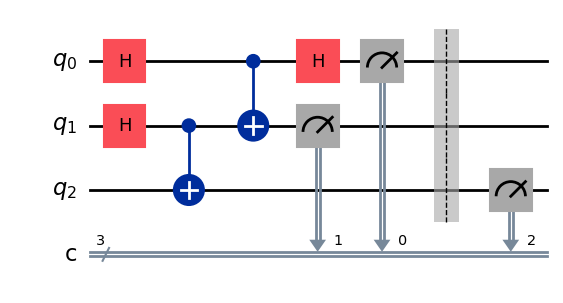

In [1]:
# quantum_teleportation_fixed.py

# Enable inline plotting in Jupyter
%matplotlib inline

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import circuit_drawer, plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt

# Create registers
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)

# --- Step 1: Prepare the state |+> to teleport ---
qc.h(q[0])

# --- Step 2: Create entanglement between Alice (q1) and Bob (q2) ---
qc.h(q[1])
qc.cx(q[1], q[2])

# --- Step 3: Bell measurement on Alice's qubits ---
qc.cx(q[0], q[1])
qc.h(q[0])
qc.measure([0, 1], [0, 1])

# --- Step 4: Measure Bob’s qubit (to verify teleportation) ---
qc.barrier()
qc.measure(q[2], c[2])

# --- Step 5: Display circuit ---
print("Quantum Teleportation Circuit:")
print(qc.draw(output='text'))

# Draw the circuit diagram inline (no .show() needed)
circuit_drawer(qc, output='mpl')
plt.show()


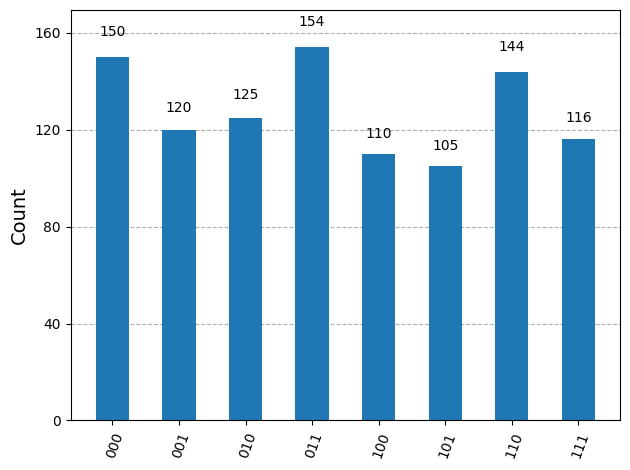

In [2]:
# Simulate circuit
backend = Aer.get_backend('aer_simulator')
qc_t = transpile(qc, backend)
result = backend.run(qc_t, shots=1024).result()
counts = result.get_counts()
# Plot measurement results
plot_histogram(counts)
plt.show()
